In [3]:
import scipy.io as sio
import scipy
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import math
import time
from numpy import genfromtxt
from tensorflow.keras import layers
import random

In [4]:
#plotting function
def plot1(x,true,nrows,ncols):  
    fig, axes = plt.subplots(nrows, ncols,figsize = (ncols*8, nrows*4))
    ax = np.array(axes)
    for i, ax1 in enumerate(ax.flat):
        #ax1 = axesf[i]
        if i < true.shape[1]:
            #ax1.set_ylim([0,1.05])
            ax1.scatter(x, true[:,i],color='black', s= 1)
        else:
            ax1.axis('off')
def plot2(true,nrows,ncols):  
    fig, axes = plt.subplots(nrows, ncols,figsize = (ncols*8, nrows*4))
    ax = np.array(axes)
    for i, ax1 in enumerate(ax.flat):
        #ax1 = axesf[i]
        if i < true.shape[1]:
            #ax1.set_ylim([0,1.05])
            ax1.plot(true[:,i],color='black')
        else:
            ax1.axis('off')
def plot3(true,nrows,ncols):  
    fig, axes = plt.subplots(nrows, ncols,figsize = (ncols*8, nrows*4))
    ax = np.array(axes)
    for i, ax1 in enumerate(ax.flat):
        if i < true.shape[1]:
            ax1.set_ylim([0,1.05])
            ax1.plot(true[:,i],color='black')
        else:
            ax1.axis('off')

            
def plotpredictionb(true, train0, predict0, nstep, frequency, nrows,ncols): 
    #print(np.round(np.sqrt(np.mean((true-predict0)**2)),3))
    fig, axes = plt.subplots(nrows, ncols,figsize = (ncols*16, nrows*2))
    plt.ylim(0,1)
    ax = np.array(axes)
    for i, ax1 in enumerate(ax.flat):
        if i < predict0.shape[1]:
            ax1.axvline(x=nstep-0.5,color='grey', linestyle = '--')
            #ax1.plot(true[:,i],color='black', linestyle = '-',marker = None,markersize = 5,label='OBS '+title[i])
            ax1.scatter(np.arange(0, true.shape[0],frequency), true[:,i],color='black', marker = 'o',s=1,label='True')
            ax1.scatter(np.arange(0, nstep,frequency),train0[:int(nstep/frequency),i],color='orange',marker = 'o',s = 1,label='Short-term')
            ax1.scatter(np.arange(nstep,nstep+predict0.shape[0]*frequency,frequency),predict0[:,i],color='green',marker = 'o',s =1,label='Long-term')
            #err = np.round(np.sqrt(np.mean((true[:,i]-predict0[:,i])**2)),3)
            ax1.set_ylim([-0.05,1.05])
            #ax1.set_title('RMSE = ' + str(err))
            #ax1.set_title(title[i])
            ax1.legend(loc=0,fontsize = 8)
        else:
            ax1.axis('off')
            

def plotprediction3b0(true, predict0, nstep, frequency,nrows,ncols): 
    fig, axes = plt.subplots(nrows, ncols,figsize = (ncols*16, nrows*2))
    #plt.ylim(0.8,1)
    ax = np.array(axes)
    for i, ax1 in enumerate(ax.flat):
        if i < predict0.shape[1]:
            ax1.axvline(x=nstep-0.5,color='grey', linestyle = '--')
            #ax1.plot(true[:,i],color='black', linestyle = '-',marker = None,markersize = 5,label='OBS '+title[i])
            ax1.scatter(np.arange(0, true.shape[0],frequency), true[:,i],color='black',marker = 'o',s = 1,label='True')
            ax1.scatter(np.arange(0, nstep,frequency),predict0[:int(nstep/frequency),i],
                     color='green',marker = 'o',s = 1,label='Training')
            ax1.scatter(np.arange(nstep,predict0.shape[0]*frequency,frequency),
                     predict0[int(nstep/frequency):,i],color='green',marker = 'o',s = 1,label='Prediction')

            #ax1.set_title(title[i])
            #ax1.set_title('RMSE = ' + str(err))
            ax1.legend(loc=0,fontsize = 8)
            ax1.set_ylim([-0.05,1.05])
        else:
            ax1.axis('off')            

            
def plotprediction3b(true, predict0, nstep, frequency,nrows,ncols): 
    fig, axes = plt.subplots(nrows, ncols,figsize = (ncols*16, nrows*2))
    #plt.ylim(0.8,1)
    ax = np.array(axes)
    for i, ax1 in enumerate(ax.flat):
        if i < predict0.shape[1]:

            #ax1.plot(true[:,i],color='black', linestyle = '-',marker = None,markersize = 5,label='OBS '+title[i])
            ax1.scatter(np.arange(0, true.shape[0],frequency), true[:,i],color='black',marker = 'o',s = 1,label='True')
            ax1.scatter(np.arange(0,predict0.shape[0]*frequency,frequency),
                     predict0[:,i],color='green',marker = 'o',s = 1,label='Prediction')

            #ax1.set_title(title[i])
            #ax1.set_title('RMSE = ' + str(err))
            ax1.legend(loc=0,fontsize = 8)
            ax1.set_ylim([-0.05,1.05])
        else:
            ax1.axis('off')
def plotpredictionlong(true, predict0,frequency,nrows,ncols): 
    fig, axes = plt.subplots(nrows, ncols,figsize = (ncols*16, nrows*2))
    #plt.ylim(0.8,1)
    ax = np.array(axes)
    for i, ax1 in enumerate(ax.flat):
        if i < predict0.shape[1]:
            #ax1.plot(true[:,i],color='black', linestyle = '-',marker = None,markersize = 5,label='OBS '+title[i])
            ax1.scatter(np.arange(0, true.shape[0],frequency), true[:,i],color='black',marker = 'o',s = 1,label='True')
            ax1.scatter(np.arange(0,predict0.shape[1]*frequency,frequency),
                     predict0[0,:,i],color='green',marker = 'o',s = 1,label='Prediction')

            #ax1.set_title(title[i])
            #ax1.set_title('RMSE = ' + str(err))
            ax1.legend(loc=0,fontsize = 8)
            ax1.set_ylim([-0.05,1.05])
        else:
            ax1.axis('off')
def normalization(prop):
    
    #prop = block_reduce(prop, block_size = (24,1), func = np.mean)
    #prop = scipy.signal.savgol_filter(prop[:-1], 1001, 2, mode = 'mirror',axis = 0)
    scaler = MinMaxScaler(feature_range=(0, 1))
    return np.reshape(scaler.fit_transform(prop.reshape([-1,1])),[-1, prop.shape[1]])

In [5]:
# Generate Toy datasets
def get_next_val(init, t, tmin, tmax, final = None):
    if final is None:
        return init
    val = init + (final - init) / (tmax - tmin) * t
    return val
def generate_periodic(time_steps, init_freq, init_amplitude, starting_point, 
    final_freq = None, final_amplitude = None, phi_offset = 0.):

    tmin = time_steps.min()
    tmax = time_steps.max()

    data = []
    t_prev = time_steps[0]
    phi = phi_offset
    for t in time_steps:
        dt = t - t_prev
        amp = get_next_val(init_amplitude, t, tmin, tmax, final_amplitude)
        freq = get_next_val(init_freq, t, tmin, tmax, final_freq)
        phi = phi + 2 * np.pi * freq * dt # integrate to get phase

        y = amp * np.sin(phi) + starting_point
        t_prev = t
        #data.append([t,y])
        data.append(y)
    return np.array(data)

def generate_periodic2(time_steps, init_freq, init_amplitude, starting_point, 
    final_freq = None, final_amplitude = None, phi_offset = 0.):

    tmin = time_steps.min()
    tmax = time_steps.max()

    data = []
    t_prev = time_steps[0]
    phi = phi_offset
    for t in time_steps[:len(time_steps)//2]:
        dt = t - t_prev
        amp = get_next_val(init_amplitude, t, tmin, tmax, final_amplitude)
        freq = get_next_val(init_freq, t, tmin, tmax, final_freq)
        phi = phi + 2 * np.pi * freq * dt # integrate to get phase

        y = amp * np.sin(phi) + starting_point
        t_prev = t
        #data.append([t,y])
        data.append(y)
    for t in time_steps[len(time_steps)//2:]:
        dt = t - t_prev
        amp = get_next_val(final_amplitude, t, tmin, tmax, init_amplitude)
        freq = get_next_val(final_freq, t, tmin, tmax, init_freq)
        phi = phi + 2 * np.pi * freq * dt # integrate to get phase

        y = amp * np.sin(phi) + starting_point
        t_prev = t
        #data.append([t,y])
        data.append(y)
    return np.array(data)

In [6]:
def interpolate_gaps(values, limit=None):
    """
    Fill gaps using linear interpolation, optionally only fill gaps up to a
    size of `limit`.
    """
    values = np.asarray(values)
    i = np.arange(values.size)
    valid = np.isfinite(values)
    filled = np.interp(i, i[valid], values[valid])

    if limit is not None:
        invalid = ~valid
        for n in range(1, limit+1):
            invalid[:-n] &= invalid[n:]
        filled[invalid] = np.nan

    return filled
def GenerateSets(x, y, frequency, twindow, twindow2, predictwindow):
    yin = np.zeros((x.shape[0] - (twindow + twindow2) * frequency + 1, twindow, y.shape[1]))
    xin = np.zeros((x.shape[0] - (twindow + twindow2) * frequency + 1, twindow, x.shape[1]))
    yout = np.zeros((x.shape[0] - (twindow + twindow2) * frequency + 1, twindow2, y.shape[1]))
    control = np.zeros((x.shape[0] - (twindow + twindow2) * frequency + 1, twindow2, x.shape[1]))
    obs = np.zeros((x.shape[0] - (twindow + twindow2) * frequency + 1, y.shape[1]))
    for i in range(x.shape[0] - (twindow + twindow2) * frequency + 1):
        for j in range(twindow):
            yin[i,j] = y[i + j * frequency]
            xin[i,j] = x[i + j * frequency]
        for j in range(twindow2):
            yout[i,j] = y[twindow * frequency + i + j * frequency]
            control[i,j] = x[twindow * frequency + i + j * frequency]
        obs[i] = y[twindow * frequency + i]
    history = np.concatenate((xin,yin), axis = 2)
    n = int(yout.shape[0]/twindow2/frequency)
    traintesthistory = np.zeros((n, twindow, x.shape[1] + y.shape[1]))
    traintestcontrol = np.zeros((n, twindow2, x.shape[1]))
    for i in range(n):
        traintesthistory[i] = history[i*twindow2*frequency]
        traintestcontrol[i] = control[i*twindow2*frequency]
    stepsize = 1
    initialwindow = yout.shape[0] - predictwindow
    

    index = np.random.permutation(initialwindow)
    historyt = (history[:initialwindow])[index]
    controlt = (control[:initialwindow])[index]
    youtt = (yout[:initialwindow])[index]
    return history, control, yout, historyt, controlt, youtt, traintesthistory, traintestcontrol, obs, initialwindow, xin, yin

In [7]:
#Build CNNRNN model without labeling scheme 
def build_model(nneck,lr, twindow, twindow2, nfeature, ncontrol):
    inputA = tf.keras.Input(batch_shape=(None, twindow, (nfeature+ncontrol)), name = 'History')
    inputB = tf.keras.Input(batch_shape=(None, None, ncontrol), name = 'Control')
    inputstate = tf.keras.Input(batch_shape=(None, nfeature), name = 'Initial_State')
    is_training = tf.keras.Input(batch_shape=(None, 1), name = 'Is_Training')
    x1 = layers.Conv1D(4,3, activation = 'relu', strides = 1, padding = 'valid', use_bias=False)(inputA)
    #x1b = layers.Conv1D(2,3, activation = 'relu', strides = 1, padding = 'valid', use_bias=False)(x1)
    #x2 = layers.Conv1D(2,3, strides = 2, padding = 'valid', use_bias=False,activation = 'relu')(x1)
    print(x1.shape)
    x2 = layers.Flatten()(x1)
    x2a1 = layers.Dense(nneck, activation = 'relu',use_bias=False,
                        kernel_regularizer=tf.keras.regularizers.l1_l2(l1=0.000001,l2=0.00005),
                        bias_regularizer=tf.keras.regularizers.l1_l2(l1=0.000001,l2=0.00005))(x2)
    x2b1 = layers.Dense(nfeature, activation = 'relu',use_bias=False,
                        kernel_regularizer=tf.keras.regularizers.l1_l2(l1=0.000001,l2=0.00005),
                        bias_regularizer=tf.keras.regularizers.l1_l2(l1=0.000001,l2=0.00005))(x2)
    x2a2 = layers.Dense(nneck, activation = 'relu',use_bias=False,
                        kernel_regularizer=tf.keras.regularizers.l1_l2(l1=0.000001,l2=0.00005),
                        bias_regularizer=tf.keras.regularizers.l1_l2(l1=0.000001,l2=0.00005))(x2)
    x2b2 = layers.Dense(nfeature, activation = 'relu',use_bias=False,
                        kernel_regularizer=tf.keras.regularizers.l1_l2(l1=0.00001,l2=0.00005),
                        bias_regularizer=tf.keras.regularizers.l1_l2(l1=0.00001,l2=0.00005))(x2)
    z0 = layers.LSTM(nneck, activation = 'relu', use_bias = True, return_state = False, 
                    return_sequences = True, unroll = False, 
                    #kernel_initializer='zeros',
                    #recurrent_initializer='identity',
                    kernel_regularizer=tf.keras.regularizers.l1_l2(l1=0.000001,l2=0.00005),
                    bias_regularizer=tf.keras.regularizers.l1_l2(l1=0.000001,l2=0.00005),
                           name = 'GRU1')(inputB, initial_state = [x2a1, x2a2])
    
    z = layers.LSTM(nfeature, activation = 'linear', use_bias = True, return_state = False, 
                    return_sequences = True, unroll = False, 
                    #kernel_initializer='identity',
                    #recurrent_initializer='identity',
                    kernel_regularizer=tf.keras.regularizers.l1_l2(l1=0.000001,l2=0.00005),
                    bias_regularizer=tf.keras.regularizers.l1_l2(l1=0.000001,l2=0.00005),
                           name = 'GRU2')(z0, initial_state = [x2b1, x2b2])
    #print(z.shape)
    initial_learning_rate = lr
    lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
        initial_learning_rate,
        decay_steps=300,
        decay_rate=0.95,
        staircase=True)
    model = tf.keras.Model(inputs=[inputA, inputB, inputstate, is_training], outputs=[z, z])
    opt = tf.keras.optimizers.Adam(learning_rate = lr_schedule, beta_1=0.9, beta_2=0.999, amsgrad=False)
    model.compile(loss=['mse', 'mae'],loss_weights=[1, 0], optimizer=opt,metrics=['accuracy'])
    return model

In [1]:
#Build CNNRNN model without labeling scheme 
def build_model2(nneck,lr, twindow, twindow2, nfeature, ncontrol):
    inputA = tf.keras.Input(batch_shape=(None, twindow, (nfeature+ncontrol)), name = 'History')
    inputB = tf.keras.Input(batch_shape=(None, None, ncontrol), name = 'Control')
    inputstate = tf.keras.Input(batch_shape=(None, nfeature), name = 'Initial_State')
    is_training = tf.keras.Input(batch_shape=(None, 1), name = 'Is_Training')
    label = tf.keras.Input(batch_shape=(None, None, nfeature), name = 'Label')
    x1 = layers.Conv1D(4,3, activation = 'relu', strides = 1, padding = 'valid', use_bias=False)(inputA)
    #x1b = layers.Conv1D(2,3, activation = 'relu', strides = 1, padding = 'valid', use_bias=False)(x1)
    #x2 = layers.Conv1D(2,3, strides = 2, padding = 'valid', use_bias=False,activation = 'relu')(x1)
    print(x1.shape)
    x2 = layers.Flatten()(x1)
    x2a1 = layers.Dense(nneck, activation = 'relu',use_bias=False,
                        kernel_regularizer=tf.keras.regularizers.l1_l2(l1=0.000001,l2=0.00005),
                        bias_regularizer=tf.keras.regularizers.l1_l2(l1=0.000001,l2=0.00005))(x2)
    x2b1 = layers.Dense(nfeature, activation = 'relu',use_bias=False,
                        kernel_regularizer=tf.keras.regularizers.l1_l2(l1=0.000001,l2=0.00005),
                        bias_regularizer=tf.keras.regularizers.l1_l2(l1=0.000001,l2=0.00005))(x2)
    x2a2 = layers.Dense(nneck, activation = 'relu',use_bias=False,
                        kernel_regularizer=tf.keras.regularizers.l1_l2(l1=0.000001,l2=0.00005),
                        bias_regularizer=tf.keras.regularizers.l1_l2(l1=0.000001,l2=0.00005))(x2)
    x2b2 = layers.Dense(nfeature, activation = 'relu',use_bias=False,
                        kernel_regularizer=tf.keras.regularizers.l1_l2(l1=0.00001,l2=0.00005),
                        bias_regularizer=tf.keras.regularizers.l1_l2(l1=0.00001,l2=0.00005))(x2)
    z0 = layers.LSTM(nneck, activation = 'relu', use_bias = True, return_state = False, 
                    return_sequences = True, unroll = False, 
                    #kernel_initializer='zeros',
                    #recurrent_initializer='identity',
                    kernel_regularizer=tf.keras.regularizers.l1_l2(l1=0.000001,l2=0.00005),
                    bias_regularizer=tf.keras.regularizers.l1_l2(l1=0.000001,l2=0.00005),
                           name = 'GRU1')(inputB, initial_state = [x2a1, x2a2])
    
    z01 = layers.LSTM(nfeature, activation = 'linear', use_bias = True, return_state = False, 
                    return_sequences = True, unroll = False, 
                    #kernel_initializer='identity',
                    #recurrent_initializer='identity',
                    kernel_regularizer=tf.keras.regularizers.l1_l2(l1=0.000001,l2=0.00005),
                    bias_regularizer=tf.keras.regularizers.l1_l2(l1=0.000001,l2=0.00005),
                           name = 'GRU2')(z0, initial_state = [x2b1, x2b2])
    z = layers.Multiply()([label, z01])
    #print(z.shape)
    initial_learning_rate = lr
    lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
        initial_learning_rate,
        decay_steps=300,
        decay_rate=0.95,
        staircase=True)
    model = tf.keras.Model(inputs=[inputA, inputB, inputstate, is_training, label], outputs=[z, z01])
    opt = tf.keras.optimizers.Adam(learning_rate = lr_schedule, beta_1=0.9, beta_2=0.999, amsgrad=False)
    model.compile(loss=['mse', 'mae'],loss_weights=[1, 0], optimizer=opt,metrics=['accuracy'])
    return model

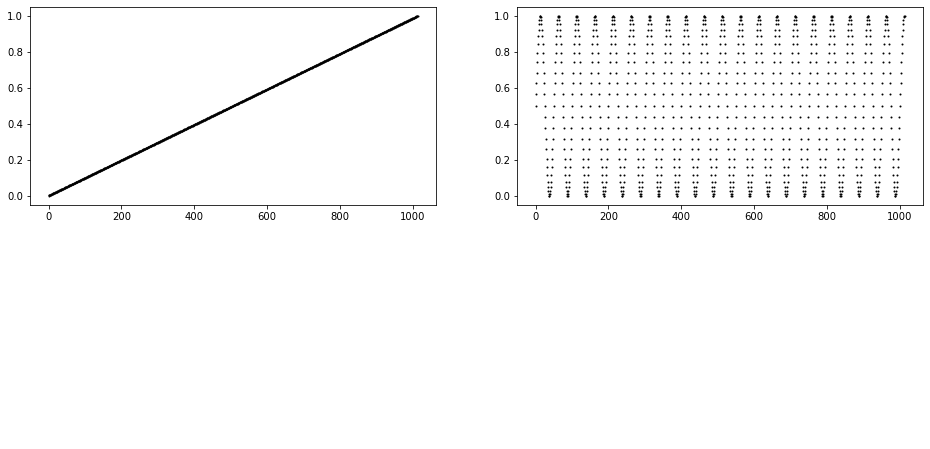

In [9]:
#number of datapoints
totaln = 1014
#training epochs
nepochs = 500
#batch size
nbsize = 50
#data frequency
frequency = 1
#validation set 
validsplit = 0
#lookback period
twindow = 6
#predicting horizon
twindow2 = 48
#test series
predictwindow = 192
#number of feature
nfeature = 1
#number of control
ncontrol = 1
#size of feature vector
nneck = 16
x = np.arange(totaln)
y00 = generate_periodic(x, 0.02, 0.5, 0,final_freq =0.02, final_amplitude = 0.5)

y00 = np.expand_dims(y00,axis =1)
#y01 = generate_periodic(x, 0.005, 0.5, 0,final_freq =0.005, final_amplitude = 0.5)
#y01 = np.expand_dims(y01,axis =1)

#y0 = np.concatenate((y00, y01), axis = 1)
y0 = normalization(y00)

x = np.expand_dims(x/totaln,axis = 1)
y = y0
plot1(np.arange(totaln),np.concatenate((x,y),axis = 1),2,2)
history, control, yout, historyt, controlt, youtt, traintesthistory, traintestcontrol, obs, initialwindow, xin, yin = GenerateSets(x, y, frequency, twindow, twindow2, predictwindow)
history2 = GenerateSets(x, y0, frequency, twindow, twindow2, predictwindow)[0]
y1 = np.copy(y)
np.save("y1.npy", y1)

In [241]:
#training
a = time.time()
model_long = build_model(nneck, twindow = twindow, twindow2 = twindow2, nfeature = nfeature, ncontrol = ncontrol, lr = 0.001)


is_training = True*np.ones(historyt.shape[0])
h = model_long.fit(
            [historyt,controlt, np.zeros((historyt.shape[0], nfeature)), is_training],
            [youtt,youtt],
            batch_size=nbsize,
            epochs=nepochs,
            validation_split=0,
            verbose=1,shuffle=True)
model_long.summary()

(None, 4, 4)
Epoch 1/500
16/16 [==============================] - 0s 17ms/step - loss: 0.3559 - GRU2_loss: 0.3527 - GRU2_1_loss: 0.4806 - GRU2_accuracy: 0.0000e+00 - GRU2_1_accuracy: 0.0000e+00
Epoch 2/500
16/16 [==============================] - 0s 14ms/step - loss: 0.2856 - GRU2_loss: 0.2825 - GRU2_1_loss: 0.4254 - GRU2_accuracy: 8.6693e-04 - GRU2_1_accuracy: 8.6693e-04
Epoch 3/500
16/16 [==============================] - 0s 14ms/step - loss: 0.2116 - GRU2_loss: 0.2085 - GRU2_1_loss: 0.3752 - GRU2_accuracy: 0.0051 - GRU2_1_accuracy: 0.0051
Epoch 4/500
16/16 [==============================] - 0s 14ms/step - loss: 0.1628 - GRU2_loss: 0.1597 - GRU2_1_loss: 0.3411 - GRU2_accuracy: 0.0112 - GRU2_1_accuracy: 0.0112
Epoch 5/500
16/16 [==============================] - 0s 14ms/step - loss: 0.1454 - GRU2_loss: 0.1424 - GRU2_1_loss: 0.3282 - GRU2_accuracy: 0.0134 - GRU2_1_accuracy: 0.0134
Epoch 6/500
16/16 [==============================] - 0s 14ms/step - loss: 0.1337 - GRU2_loss: 0.1308 - GRU

Epoch 48/500
16/16 [==============================] - 0s 13ms/step - loss: 0.0038 - GRU2_loss: 0.0011 - GRU2_1_loss: 0.0244 - GRU2_accuracy: 0.0399 - GRU2_1_accuracy: 0.0399
Epoch 49/500
16/16 [==============================] - 0s 13ms/step - loss: 0.0037 - GRU2_loss: 0.0011 - GRU2_1_loss: 0.0235 - GRU2_accuracy: 0.0399 - GRU2_1_accuracy: 0.0399
Epoch 50/500
16/16 [==============================] - 0s 13ms/step - loss: 0.0037 - GRU2_loss: 0.0010 - GRU2_1_loss: 0.0230 - GRU2_accuracy: 0.0399 - GRU2_1_accuracy: 0.0399
Epoch 51/500
16/16 [==============================] - 0s 13ms/step - loss: 0.0036 - GRU2_loss: 9.9527e-04 - GRU2_1_loss: 0.0226 - GRU2_accuracy: 0.0399 - GRU2_1_accuracy: 0.0399
Epoch 52/500
16/16 [==============================] - 0s 13ms/step - loss: 0.0036 - GRU2_loss: 9.5578e-04 - GRU2_1_loss: 0.0220 - GRU2_accuracy: 0.0399 - GRU2_1_accuracy: 0.0399
Epoch 53/500
16/16 [==============================] - 0s 13ms/step - loss: 0.0036 - GRU2_loss: 9.2389e-04 - GRU2_1_loss: 0

16/16 [==============================] - 0s 13ms/step - loss: 0.0023 - GRU2_loss: 1.3276e-04 - GRU2_1_loss: 0.0081 - GRU2_accuracy: 0.0399 - GRU2_1_accuracy: 0.0399
Epoch 140/500
16/16 [==============================] - 0s 13ms/step - loss: 0.0023 - GRU2_loss: 1.2778e-04 - GRU2_1_loss: 0.0079 - GRU2_accuracy: 0.0399 - GRU2_1_accuracy: 0.0399
Epoch 141/500
16/16 [==============================] - 0s 13ms/step - loss: 0.0023 - GRU2_loss: 1.3229e-04 - GRU2_1_loss: 0.0081 - GRU2_accuracy: 0.0399 - GRU2_1_accuracy: 0.0399
Epoch 142/500
16/16 [==============================] - 0s 14ms/step - loss: 0.0023 - GRU2_loss: 1.2922e-04 - GRU2_1_loss: 0.0080 - GRU2_accuracy: 0.0399 - GRU2_1_accuracy: 0.0399
Epoch 143/500
16/16 [==============================] - 0s 13ms/step - loss: 0.0023 - GRU2_loss: 1.2268e-04 - GRU2_1_loss: 0.0076 - GRU2_accuracy: 0.0399 - GRU2_1_accuracy: 0.0399
Epoch 144/500
16/16 [==============================] - 0s 13ms/step - loss: 0.0023 - GRU2_loss: 1.2177e-04 - GRU2_1_los

16/16 [==============================] - 0s 13ms/step - loss: 0.0018 - GRU2_loss: 6.8682e-05 - GRU2_1_loss: 0.0057 - GRU2_accuracy: 0.0399 - GRU2_1_accuracy: 0.0399
Epoch 230/500
16/16 [==============================] - 0s 14ms/step - loss: 0.0018 - GRU2_loss: 6.8535e-05 - GRU2_1_loss: 0.0057 - GRU2_accuracy: 0.0399 - GRU2_1_accuracy: 0.0399
Epoch 231/500
16/16 [==============================] - 0s 13ms/step - loss: 0.0018 - GRU2_loss: 6.7347e-05 - GRU2_1_loss: 0.0056 - GRU2_accuracy: 0.0399 - GRU2_1_accuracy: 0.0399
Epoch 232/500
16/16 [==============================] - 0s 13ms/step - loss: 0.0018 - GRU2_loss: 6.7776e-05 - GRU2_1_loss: 0.0056 - GRU2_accuracy: 0.0399 - GRU2_1_accuracy: 0.0399
Epoch 233/500
16/16 [==============================] - 0s 13ms/step - loss: 0.0018 - GRU2_loss: 6.9941e-05 - GRU2_1_loss: 0.0058 - GRU2_accuracy: 0.0399 - GRU2_1_accuracy: 0.0399
Epoch 234/500
16/16 [==============================] - 0s 14ms/step - loss: 0.0018 - GRU2_loss: 6.9021e-05 - GRU2_1_los

16/16 [==============================] - 0s 14ms/step - loss: 0.0015 - GRU2_loss: 4.7594e-05 - GRU2_1_loss: 0.0047 - GRU2_accuracy: 0.0399 - GRU2_1_accuracy: 0.0399
Epoch 320/500
16/16 [==============================] - 0s 13ms/step - loss: 0.0015 - GRU2_loss: 4.5047e-05 - GRU2_1_loss: 0.0045 - GRU2_accuracy: 0.0399 - GRU2_1_accuracy: 0.0399
Epoch 321/500
16/16 [==============================] - 0s 13ms/step - loss: 0.0015 - GRU2_loss: 4.5183e-05 - GRU2_1_loss: 0.0046 - GRU2_accuracy: 0.0399 - GRU2_1_accuracy: 0.0399
Epoch 322/500
16/16 [==============================] - 0s 13ms/step - loss: 0.0015 - GRU2_loss: 4.4067e-05 - GRU2_1_loss: 0.0045 - GRU2_accuracy: 0.0399 - GRU2_1_accuracy: 0.0399
Epoch 323/500
16/16 [==============================] - 0s 13ms/step - loss: 0.0015 - GRU2_loss: 4.5581e-05 - GRU2_1_loss: 0.0046 - GRU2_accuracy: 0.0399 - GRU2_1_accuracy: 0.0399
Epoch 324/500
16/16 [==============================] - 0s 13ms/step - loss: 0.0015 - GRU2_loss: 4.5365e-05 - GRU2_1_los

16/16 [==============================] - 0s 13ms/step - loss: 0.0012 - GRU2_loss: 3.4961e-05 - GRU2_1_loss: 0.0041 - GRU2_accuracy: 0.0399 - GRU2_1_accuracy: 0.0399
Epoch 410/500
16/16 [==============================] - 0s 13ms/step - loss: 0.0012 - GRU2_loss: 3.3703e-05 - GRU2_1_loss: 0.0040 - GRU2_accuracy: 0.0399 - GRU2_1_accuracy: 0.0399
Epoch 411/500
16/16 [==============================] - 0s 13ms/step - loss: 0.0012 - GRU2_loss: 3.3521e-05 - GRU2_1_loss: 0.0039 - GRU2_accuracy: 0.0399 - GRU2_1_accuracy: 0.0399
Epoch 412/500
16/16 [==============================] - 0s 13ms/step - loss: 0.0012 - GRU2_loss: 3.6300e-05 - GRU2_1_loss: 0.0042 - GRU2_accuracy: 0.0399 - GRU2_1_accuracy: 0.0399
Epoch 413/500
16/16 [==============================] - 0s 13ms/step - loss: 0.0012 - GRU2_loss: 4.9444e-05 - GRU2_1_loss: 0.0052 - GRU2_accuracy: 0.0399 - GRU2_1_accuracy: 0.0399
Epoch 414/500
16/16 [==============================] - 0s 13ms/step - loss: 0.0012 - GRU2_loss: 5.1975e-05 - GRU2_1_los

16/16 [==============================] - 0s 13ms/step - loss: 0.0010 - GRU2_loss: 2.5644e-05 - GRU2_1_loss: 0.0034 - GRU2_accuracy: 0.0399 - GRU2_1_accuracy: 0.0399
Epoch 500/500
16/16 [==============================] - 0s 13ms/step - loss: 0.0010 - GRU2_loss: 2.6230e-05 - GRU2_1_loss: 0.0035 - GRU2_accuracy: 0.0399 - GRU2_1_accuracy: 0.0399
Model: "functional_119"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
History (InputLayer)            [(None, 6, 2)]       0                                            
__________________________________________________________________________________________________
conv1d_59 (Conv1D)              (None, 4, 4)         24          History[0][0]                    
__________________________________________________________________________________________________
flatten_59 (Flatten)            (None,

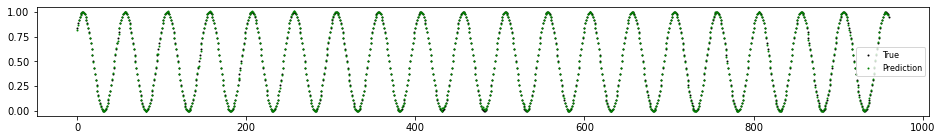

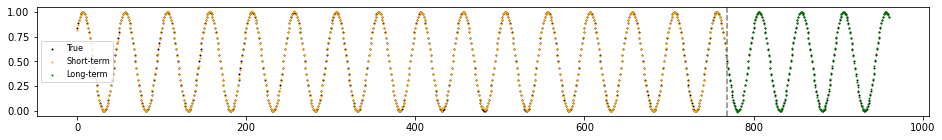

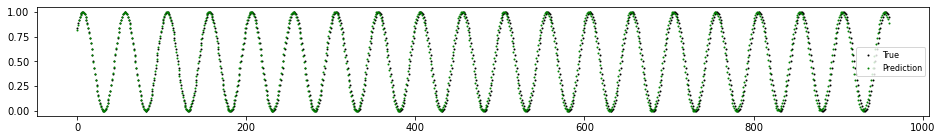

In [242]:
is_training = False * np.ones(traintesthistory.shape[0])
presultlong = np.zeros((int((history.shape[0]-initialwindow)/frequency),y.shape[1]))
#Short-term Prediction
ptrainlong = (model_long.predict([traintesthistory,traintestcontrol, 
                                  np.zeros((traintesthistory.shape[0],nfeature)),
                                  is_training])[0]).reshape((-1,nfeature))
plotprediction3b(obs.reshape((-1,nfeature)),ptrainlong,initialwindow, frequency, 1,1)
is_training = np.ones((1,1))
buff = np.zeros(history[initialwindow:initialwindow+1].shape)
buff[:] = history[initialwindow:initialwindow+1]
state = np.zeros((1,nfeature))
presultlong = model_long.predict([buff,np.reshape(control[initialwindow:, 0,:], (1, -1, ncontrol)), 
                                             state, is_training])[0]
plotpredictionb(obs.reshape((-1,nfeature)), ptrainlong, presultlong[0], initialwindow, frequency, 1, 1)
is_training = np.ones((1,1))
buff = np.zeros(history[:1].shape)
buff[:] = history[:1]
state = np.zeros((1,nfeature))
presultlong = model_long.predict([buff,np.reshape(control[:, 0,:], (1, -1, ncontrol)), 
                                             state, is_training])[0]
plotpredictionlong(obs.reshape((-1,nfeature)), presultlong, frequency, 1, 1)

In [243]:
model_long.save_weights("saved_weights/test1_ckpt")
model_long.save('saved_model/test1_model')

INFO:tensorflow:Assets written to: saved_model/test1_model\assets


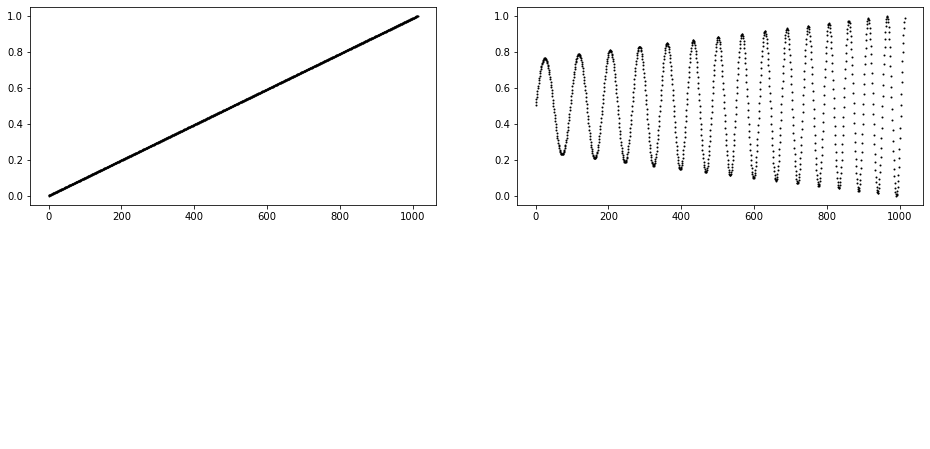

In [41]:
#number of feature
nfeature = 1
#number of control
ncontrol = 1
x = np.arange(totaln)
y00 = generate_periodic(x, 0.01, 0.5, 0,final_freq =0.02, final_amplitude = 1)

y00 = np.expand_dims(y00,axis =1)
#y01 = generate_periodic(x, 0.005, 0.5, 0,final_freq =0.005, final_amplitude = 0.5)
#y01 = np.expand_dims(y01,axis =1)

#y0 = np.concatenate((y00, y01), axis = 1)
y0 = normalization(y00)

x = np.expand_dims(x/totaln,axis = 1)
y = y0
plot1(np.arange(totaln),np.concatenate((x,y),axis = 1),2,2)
history, control, yout, historyt, controlt, youtt, traintesthistory, traintestcontrol, obs, initialwindow, xin, yin = GenerateSets(x, y, frequency, twindow, twindow2, predictwindow)
history2 = GenerateSets(x, y0, frequency, twindow, twindow2, predictwindow)[0]
y2 = np.copy(y)
np.save("y2.npy", y2)

In [42]:
#training
a = time.time()
model_long = build_model(nneck, twindow = twindow, twindow2 = twindow2, nfeature = nfeature, ncontrol = ncontrol, lr = 0.001)


is_training = True*np.ones(historyt.shape[0])
h = model_long.fit(
            [historyt,controlt, np.zeros((historyt.shape[0], nfeature)), is_training],
            [youtt,youtt],
            batch_size=nbsize,
            epochs=nepochs,
            validation_split=0,
            verbose=1,shuffle=True)
model_long.summary()

(None, 4, 4)
Epoch 1/500
16/16 [==============================] - 0s 17ms/step - loss: 0.3322 - GRU2_loss: 0.3291 - GRU2_1_loss: 0.5129 - GRU2_accuracy: 0.0000e+00 - GRU2_1_accuracy: 0.0000e+00
Epoch 2/500
16/16 [==============================] - 0s 15ms/step - loss: 0.2911 - GRU2_loss: 0.2881 - GRU2_1_loss: 0.4725 - GRU2_accuracy: 0.0000e+00 - GRU2_1_accuracy: 0.0000e+00
Epoch 3/500
16/16 [==============================] - 0s 15ms/step - loss: 0.2375 - GRU2_loss: 0.2346 - GRU2_1_loss: 0.4137 - GRU2_accuracy: 0.0000e+00 - GRU2_1_accuracy: 0.0000e+00
Epoch 4/500
16/16 [==============================] - 0s 15ms/step - loss: 0.1317 - GRU2_loss: 0.1289 - GRU2_1_loss: 0.2968 - GRU2_accuracy: 0.0000e+00 - GRU2_1_accuracy: 0.0000e+00: 0s - loss: 0.1713 - GRU2_loss: 0.1684 - GRU2_1_loss: 0.3356 - GRU2_accuracy: 0.0000e+00 - GRU2_1_accuracy: 0.0000e
Epoch 5/500
16/16 [==============================] - 0s 13ms/step - loss: 0.0897 - GRU2_loss: 0.0870 - GRU2_1_loss: 0.2499 - GRU2_accuracy: 0.0000e

16/16 [==============================] - 0s 14ms/step - loss: 0.0027 - GRU2_loss: 9.9944e-04 - GRU2_1_loss: 0.0245 - GRU2_accuracy: 0.0000e+00 - GRU2_1_accuracy: 0.0000e+00
Epoch 91/500
16/16 [==============================] - 0s 14ms/step - loss: 0.0027 - GRU2_loss: 9.9773e-04 - GRU2_1_loss: 0.0252 - GRU2_accuracy: 0.0000e+00 - GRU2_1_accuracy: 0.0000e+00
Epoch 92/500
16/16 [==============================] - 0s 17ms/step - loss: 0.0026 - GRU2_loss: 9.2209e-04 - GRU2_1_loss: 0.0235 - GRU2_accuracy: 0.0000e+00 - GRU2_1_accuracy: 0.0000e+00
Epoch 93/500
16/16 [==============================] - 0s 14ms/step - loss: 0.0026 - GRU2_loss: 8.9370e-04 - GRU2_1_loss: 0.0234 - GRU2_accuracy: 0.0000e+00 - GRU2_1_accuracy: 0.0000e+00
Epoch 94/500
16/16 [==============================] - 0s 14ms/step - loss: 0.0026 - GRU2_loss: 8.9342e-04 - GRU2_1_loss: 0.0234 - GRU2_accuracy: 0.0000e+00 - GRU2_1_accuracy: 0.0000e+00
Epoch 95/500
16/16 [==============================] - 0s 14ms/step - loss: 0.0025 -

16/16 [==============================] - 0s 14ms/step - loss: 0.0018 - GRU2_loss: 2.4950e-04 - GRU2_1_loss: 0.0122 - GRU2_accuracy: 0.0000e+00 - GRU2_1_accuracy: 0.0000e+00
Epoch 177/500
16/16 [==============================] - 0s 13ms/step - loss: 0.0017 - GRU2_loss: 2.2393e-04 - GRU2_1_loss: 0.0113 - GRU2_accuracy: 0.0000e+00 - GRU2_1_accuracy: 0.0000e+00
Epoch 178/500
16/16 [==============================] - 0s 13ms/step - loss: 0.0017 - GRU2_loss: 2.2491e-04 - GRU2_1_loss: 0.0113 - GRU2_accuracy: 0.0000e+00 - GRU2_1_accuracy: 0.0000e+00
Epoch 179/500
16/16 [==============================] - 0s 13ms/step - loss: 0.0017 - GRU2_loss: 2.2505e-04 - GRU2_1_loss: 0.0115 - GRU2_accuracy: 0.0000e+00 - GRU2_1_accuracy: 0.0000e+00
Epoch 180/500
16/16 [==============================] - 0s 13ms/step - loss: 0.0017 - GRU2_loss: 2.3159e-04 - GRU2_1_loss: 0.0117 - GRU2_accuracy: 0.0000e+00 - GRU2_1_accuracy: 0.0000e+00
Epoch 181/500
16/16 [==============================] - 0s 13ms/step - loss: 0.0

16/16 [==============================] - 0s 13ms/step - loss: 0.0014 - GRU2_loss: 1.0169e-04 - GRU2_1_loss: 0.0074 - GRU2_accuracy: 0.0000e+00 - GRU2_1_accuracy: 0.0000e+00
Epoch 263/500
16/16 [==============================] - 0s 13ms/step - loss: 0.0014 - GRU2_loss: 1.0474e-04 - GRU2_1_loss: 0.0076 - GRU2_accuracy: 0.0000e+00 - GRU2_1_accuracy: 0.0000e+00
Epoch 264/500
16/16 [==============================] - 0s 13ms/step - loss: 0.0014 - GRU2_loss: 1.1832e-04 - GRU2_1_loss: 0.0081 - GRU2_accuracy: 0.0000e+00 - GRU2_1_accuracy: 0.0000e+00
Epoch 265/500
16/16 [==============================] - 0s 14ms/step - loss: 0.0014 - GRU2_loss: 1.0821e-04 - GRU2_1_loss: 0.0077 - GRU2_accuracy: 0.0000e+00 - GRU2_1_accuracy: 0.0000e+00
Epoch 266/500
16/16 [==============================] - 0s 14ms/step - loss: 0.0014 - GRU2_loss: 1.0492e-04 - GRU2_1_loss: 0.0075 - GRU2_accuracy: 0.0000e+00 - GRU2_1_accuracy: 0.0000e+00
Epoch 267/500
16/16 [==============================] - 0s 13ms/step - loss: 0.0

16/16 [==============================] - 0s 13ms/step - loss: 0.0012 - GRU2_loss: 6.8141e-05 - GRU2_1_loss: 0.0060 - GRU2_accuracy: 0.0000e+00 - GRU2_1_accuracy: 0.0000e+00
Epoch 349/500
16/16 [==============================] - 0s 13ms/step - loss: 0.0012 - GRU2_loss: 6.6117e-05 - GRU2_1_loss: 0.0059 - GRU2_accuracy: 0.0000e+00 - GRU2_1_accuracy: 0.0000e+00
Epoch 350/500
16/16 [==============================] - 0s 13ms/step - loss: 0.0012 - GRU2_loss: 7.2969e-05 - GRU2_1_loss: 0.0063 - GRU2_accuracy: 0.0000e+00 - GRU2_1_accuracy: 0.0000e+00
Epoch 351/500
16/16 [==============================] - 0s 13ms/step - loss: 0.0012 - GRU2_loss: 7.6090e-05 - GRU2_1_loss: 0.0065 - GRU2_accuracy: 0.0000e+00 - GRU2_1_accuracy: 0.0000e+00
Epoch 352/500
16/16 [==============================] - 0s 13ms/step - loss: 0.0012 - GRU2_loss: 7.2016e-05 - GRU2_1_loss: 0.0062 - GRU2_accuracy: 0.0000e+00 - GRU2_1_accuracy: 0.0000e+00
Epoch 353/500
16/16 [==============================] - 0s 13ms/step - loss: 0.0

16/16 [==============================] - 0s 13ms/step - loss: 0.0011 - GRU2_loss: 5.1133e-05 - GRU2_1_loss: 0.0052 - GRU2_accuracy: 0.0000e+00 - GRU2_1_accuracy: 0.0000e+00
Epoch 435/500
16/16 [==============================] - 0s 13ms/step - loss: 0.0011 - GRU2_loss: 5.2329e-05 - GRU2_1_loss: 0.0053 - GRU2_accuracy: 0.0000e+00 - GRU2_1_accuracy: 0.0000e+00
Epoch 436/500
16/16 [==============================] - 0s 13ms/step - loss: 0.0011 - GRU2_loss: 5.5782e-05 - GRU2_1_loss: 0.0055 - GRU2_accuracy: 0.0000e+00 - GRU2_1_accuracy: 0.0000e+00
Epoch 437/500
16/16 [==============================] - 0s 13ms/step - loss: 0.0011 - GRU2_loss: 5.3750e-05 - GRU2_1_loss: 0.0054 - GRU2_accuracy: 0.0000e+00 - GRU2_1_accuracy: 0.0000e+00
Epoch 438/500
16/16 [==============================] - 0s 14ms/step - loss: 0.0010 - GRU2_loss: 4.7417e-05 - GRU2_1_loss: 0.0050 - GRU2_accuracy: 0.0000e+00 - GRU2_1_accuracy: 0.0000e+00
Epoch 439/500
16/16 [==============================] - 0s 14ms/step - loss: 0.0

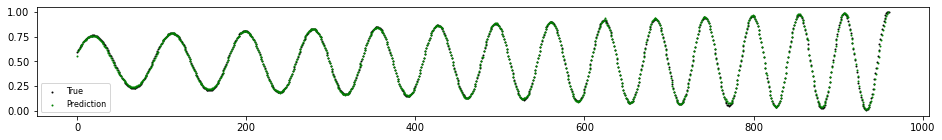

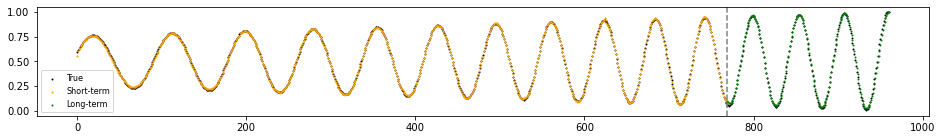

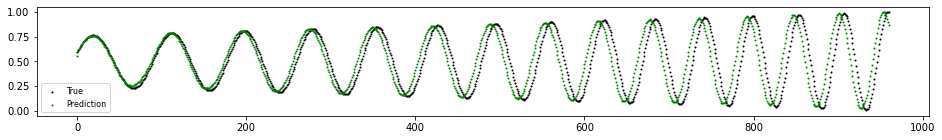

In [43]:
is_training = False * np.ones(traintesthistory.shape[0])
presultlong = np.zeros((int((history.shape[0]-initialwindow)/frequency),y.shape[1]))
#Short-term Prediction
ptrainlong = (model_long.predict([traintesthistory,traintestcontrol, 
                                  np.zeros((traintesthistory.shape[0],nfeature)),
                                  is_training])[0]).reshape((-1,nfeature))
plotprediction3b(obs.reshape((-1,nfeature)),ptrainlong,initialwindow, frequency, 1,1)
is_training = np.ones((1,1))
buff = np.zeros(history[initialwindow:initialwindow+1].shape)
buff[:] = history[initialwindow:initialwindow+1]
state = np.zeros((1,nfeature))
presultlong = model_long.predict([buff,np.reshape(control[initialwindow:, 0,:], (1, -1, ncontrol)), 
                                             state, is_training])[0]
plotpredictionb(obs.reshape((-1,nfeature)), ptrainlong, presultlong[0], initialwindow, frequency, 1, 1)
is_training = np.ones((1,1))
buff = np.zeros(history[:1].shape)
buff[:] = history[:1]
state = np.zeros((1,nfeature))
presultlong = model_long.predict([buff,np.reshape(control[:, 0,:], (1, -1, ncontrol)), 
                                             state, is_training])[0]
plotpredictionlong(obs.reshape((-1,nfeature)), presultlong, frequency, 1, 1)

In [44]:
model_long.save_weights("saved_weights/test2_ckpt")
model_long.save('saved_model/test2_model')

INFO:tensorflow:Assets written to: saved_model/test2_model\assets


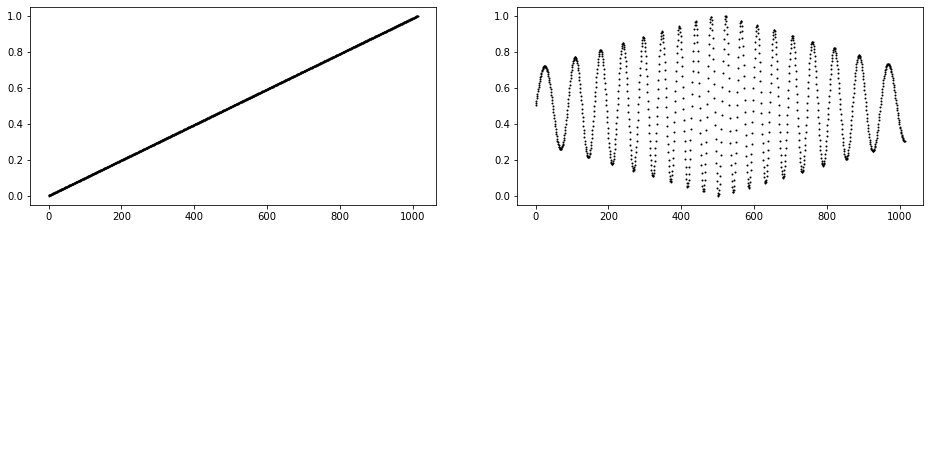

In [22]:
x = np.arange(totaln)
y00 = generate_periodic2(x, 0.01, 0.25, 0,final_freq =0.04, final_amplitude = 1)

y00 = np.expand_dims(y00,axis =1)
#y01 = generate_periodic(x, 0.005, 0.5, 0,final_freq =0.005, final_amplitude = 0.5)
#y01 = np.expand_dims(y01,axis =1)

#y0 = np.concatenate((y00, y01), axis = 1)
y0 = normalization(y00)

x = np.expand_dims(x/totaln,axis = 1)
y = y0
plot1(np.arange(totaln),np.concatenate((x,y),axis = 1),2,2)
history, control, yout, historyt, controlt, youtt, traintesthistory, traintestcontrol, obs, initialwindow, xin, yin = GenerateSets(x, y, frequency, twindow, twindow2, predictwindow)
history2 = GenerateSets(x, y0, frequency, twindow, twindow2, predictwindow)[0]
y3 = np.copy(y)
np.save("y3.npy", y3)

In [290]:
#training
a = time.time()
model_long = build_model(nneck, twindow = twindow, twindow2 = twindow2, nfeature = nfeature, ncontrol = ncontrol, lr = 0.001)


is_training = True*np.ones(historyt.shape[0])
h = model_long.fit(
            [historyt,controlt, np.zeros((historyt.shape[0], nfeature)), is_training],
            [youtt,youtt],
            batch_size=nbsize,
            epochs=nepochs,
            validation_split=0,
            verbose=1,shuffle=True)
model_long.summary()

(None, 4, 4)
Epoch 1/500
16/16 [==============================] - 0s 29ms/step - loss: 0.3163 - GRU2_loss: 0.3131 - GRU2_1_loss: 0.4860 - GRU2_accuracy: 0.0013 - GRU2_1_accuracy: 0.0013
Epoch 2/500
16/16 [==============================] - 0s 26ms/step - loss: 0.2486 - GRU2_loss: 0.2455 - GRU2_1_loss: 0.4160 - GRU2_accuracy: 0.0013 - GRU2_1_accuracy: 0.0013
Epoch 3/500
16/16 [==============================] - 0s 26ms/step - loss: 0.1497 - GRU2_loss: 0.1466 - GRU2_1_loss: 0.3148 - GRU2_accuracy: 0.0013 - GRU2_1_accuracy: 0.0013
Epoch 4/500
16/16 [==============================] - 0s 27ms/step - loss: 0.0975 - GRU2_loss: 0.0944 - GRU2_1_loss: 0.2638 - GRU2_accuracy: 9.7529e-04 - GRU2_1_accuracy: 9.7529e-04
Epoch 5/500
16/16 [==============================] - 0s 27ms/step - loss: 0.0867 - GRU2_loss: 0.0837 - GRU2_1_loss: 0.2509 - GRU2_accuracy: 9.4820e-04 - GRU2_1_accuracy: 9.4820e-04
Epoch 6/500
16/16 [==============================] - 0s 27ms/step - loss: 0.0772 - GRU2_loss: 0.0743 - GRU

16/16 [==============================] - 0s 15ms/step - loss: 0.0043 - GRU2_loss: 0.0019 - GRU2_1_loss: 0.0335 - GRU2_accuracy: 0.0026 - GRU2_1_accuracy: 0.0026
Epoch 95/500
16/16 [==============================] - 0s 15ms/step - loss: 0.0043 - GRU2_loss: 0.0018 - GRU2_1_loss: 0.0336 - GRU2_accuracy: 0.0026 - GRU2_1_accuracy: 0.0026
Epoch 96/500
16/16 [==============================] - 0s 15ms/step - loss: 0.0043 - GRU2_loss: 0.0018 - GRU2_1_loss: 0.0329 - GRU2_accuracy: 0.0026 - GRU2_1_accuracy: 0.0026
Epoch 97/500
16/16 [==============================] - 0s 15ms/step - loss: 0.0043 - GRU2_loss: 0.0019 - GRU2_1_loss: 0.0335 - GRU2_accuracy: 0.0026 - GRU2_1_accuracy: 0.0026
Epoch 98/500
16/16 [==============================] - 0s 15ms/step - loss: 0.0045 - GRU2_loss: 0.0020 - GRU2_1_loss: 0.0350 - GRU2_accuracy: 0.0026 - GRU2_1_accuracy: 0.0026
Epoch 99/500
16/16 [==============================] - 0s 15ms/step - loss: 0.0043 - GRU2_loss: 0.0018 - GRU2_1_loss: 0.0331 - GRU2_accuracy: 0.

16/16 [==============================] - 0s 18ms/step - loss: 0.0031 - GRU2_loss: 8.8529e-04 - GRU2_1_loss: 0.0227 - GRU2_accuracy: 0.0026 - GRU2_1_accuracy: 0.0026
Epoch 187/500
16/16 [==============================] - 0s 18ms/step - loss: 0.0029 - GRU2_loss: 7.3111e-04 - GRU2_1_loss: 0.0207 - GRU2_accuracy: 0.0026 - GRU2_1_accuracy: 0.0026
Epoch 188/500
16/16 [==============================] - 0s 21ms/step - loss: 0.0030 - GRU2_loss: 7.6966e-04 - GRU2_1_loss: 0.0213 - GRU2_accuracy: 0.0026 - GRU2_1_accuracy: 0.0026
Epoch 189/500
16/16 [==============================] - 0s 18ms/step - loss: 0.0029 - GRU2_loss: 7.0903e-04 - GRU2_1_loss: 0.0203 - GRU2_accuracy: 0.0026 - GRU2_1_accuracy: 0.0026
Epoch 190/500
16/16 [==============================] - 0s 18ms/step - loss: 0.0029 - GRU2_loss: 7.3962e-04 - GRU2_1_loss: 0.0209 - GRU2_accuracy: 0.0026 - GRU2_1_accuracy: 0.0026
Epoch 191/500
16/16 [==============================] - 0s 18ms/step - loss: 0.0030 - GRU2_loss: 8.0164e-04 - GRU2_1_los

16/16 [==============================] - 0s 20ms/step - loss: 0.0026 - GRU2_loss: 5.6342e-04 - GRU2_1_loss: 0.0181 - GRU2_accuracy: 0.0026 - GRU2_1_accuracy: 0.0026
Epoch 277/500
16/16 [==============================] - 0s 19ms/step - loss: 0.0025 - GRU2_loss: 5.4601e-04 - GRU2_1_loss: 0.0178 - GRU2_accuracy: 0.0026 - GRU2_1_accuracy: 0.0026
Epoch 278/500
16/16 [==============================] - 0s 19ms/step - loss: 0.0025 - GRU2_loss: 5.0855e-04 - GRU2_1_loss: 0.0171 - GRU2_accuracy: 0.0026 - GRU2_1_accuracy: 0.0026
Epoch 279/500
16/16 [==============================] - 0s 19ms/step - loss: 0.0025 - GRU2_loss: 5.1671e-04 - GRU2_1_loss: 0.0172 - GRU2_accuracy: 0.0026 - GRU2_1_accuracy: 0.0026
Epoch 280/500
16/16 [==============================] - 0s 19ms/step - loss: 0.0025 - GRU2_loss: 5.3430e-04 - GRU2_1_loss: 0.0175 - GRU2_accuracy: 0.0026 - GRU2_1_accuracy: 0.0026
Epoch 281/500
16/16 [==============================] - 0s 19ms/step - loss: 0.0025 - GRU2_loss: 5.3136e-04 - GRU2_1_los

16/16 [==============================] - 0s 20ms/step - loss: 0.0023 - GRU2_loss: 4.2576e-04 - GRU2_1_loss: 0.0160 - GRU2_accuracy: 0.0026 - GRU2_1_accuracy: 0.0026
Epoch 367/500
16/16 [==============================] - 0s 25ms/step - loss: 0.0023 - GRU2_loss: 4.9869e-04 - GRU2_1_loss: 0.0171 - GRU2_accuracy: 0.0026 - GRU2_1_accuracy: 0.0026
Epoch 368/500
16/16 [==============================] - 0s 21ms/step - loss: 0.0023 - GRU2_loss: 5.0933e-04 - GRU2_1_loss: 0.0170 - GRU2_accuracy: 0.0026 - GRU2_1_accuracy: 0.0026
Epoch 369/500
16/16 [==============================] - 0s 22ms/step - loss: 0.0023 - GRU2_loss: 4.4554e-04 - GRU2_1_loss: 0.0160 - GRU2_accuracy: 0.0026 - GRU2_1_accuracy: 0.0026
Epoch 370/500
16/16 [==============================] - 0s 22ms/step - loss: 0.0022 - GRU2_loss: 3.9232e-04 - GRU2_1_loss: 0.0152 - GRU2_accuracy: 0.0026 - GRU2_1_accuracy: 0.0026
Epoch 371/500
16/16 [==============================] - 0s 22ms/step - loss: 0.0022 - GRU2_loss: 3.7859e-04 - GRU2_1_los

16/16 [==============================] - 0s 20ms/step - loss: 0.0020 - GRU2_loss: 3.1486e-04 - GRU2_1_loss: 0.0136 - GRU2_accuracy: 0.0026 - GRU2_1_accuracy: 0.0026
Epoch 457/500
16/16 [==============================] - 0s 19ms/step - loss: 0.0020 - GRU2_loss: 3.1572e-04 - GRU2_1_loss: 0.0136 - GRU2_accuracy: 0.0026 - GRU2_1_accuracy: 0.0026
Epoch 458/500
16/16 [==============================] - 0s 20ms/step - loss: 0.0020 - GRU2_loss: 3.4032e-04 - GRU2_1_loss: 0.0141 - GRU2_accuracy: 0.0026 - GRU2_1_accuracy: 0.0026
Epoch 459/500
16/16 [==============================] - 0s 20ms/step - loss: 0.0020 - GRU2_loss: 3.2808e-04 - GRU2_1_loss: 0.0139 - GRU2_accuracy: 0.0026 - GRU2_1_accuracy: 0.0026
Epoch 460/500
16/16 [==============================] - 0s 20ms/step - loss: 0.0020 - GRU2_loss: 3.2121e-04 - GRU2_1_loss: 0.0138 - GRU2_accuracy: 0.0026 - GRU2_1_accuracy: 0.0026
Epoch 461/500
16/16 [==============================] - 0s 21ms/step - loss: 0.0020 - GRU2_loss: 3.2146e-04 - GRU2_1_los

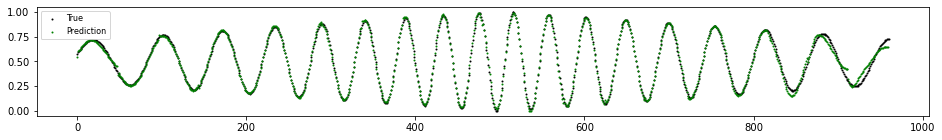

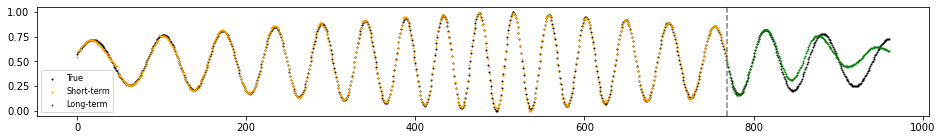

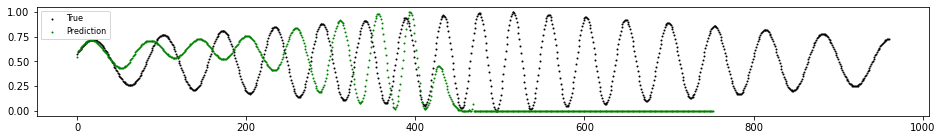

In [291]:
is_training = False * np.ones(traintesthistory.shape[0])
presultlong = np.zeros((int((history.shape[0]-initialwindow)/frequency),y.shape[1]))
#Short-term Prediction
ptrainlong = (model_long.predict([traintesthistory,traintestcontrol, 
                                  np.zeros((traintesthistory.shape[0],nfeature)),
                                  is_training])[0]).reshape((-1,nfeature))
plotprediction3b(obs.reshape((-1,nfeature)),ptrainlong,initialwindow, frequency, 1,1)
is_training = np.ones((1,1))
buff = np.zeros(history[initialwindow:initialwindow+1].shape)
buff[:] = history[initialwindow:initialwindow+1]
state = np.zeros((1,nfeature))
presultlong = model_long.predict([buff,np.reshape(control[initialwindow:, 0,:], (1, -1, ncontrol)), 
                                             state, is_training])[0]
plotpredictionb(obs.reshape((-1,nfeature)), ptrainlong, presultlong[0], initialwindow, frequency, 1, 1)
is_training = np.ones((1,1))
buff = np.zeros(history[:1].shape)
buff[:] = history[:1]
state = np.zeros((1,nfeature))
presultlong = model_long.predict([buff,np.reshape(control[:, 0,:], (1, -1, ncontrol)), 
                                             state, is_training])[0]
plotpredictionlong(obs.reshape((-1,nfeature)), presultlong, frequency, 1, 1)

In [292]:
model_long.save_weights("saved_weights/test3_ckpt")
model_long.save('saved_model/test3_model')

INFO:tensorflow:Assets written to: saved_model/test3_model\assets


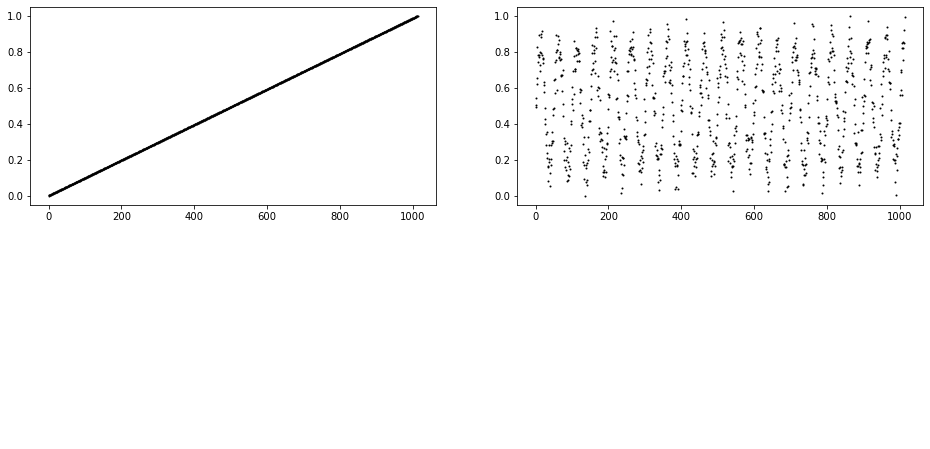

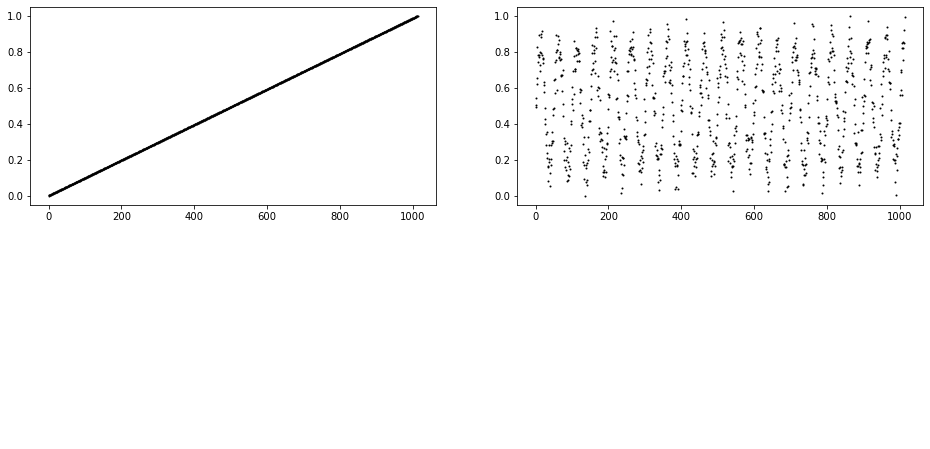

In [25]:
x = np.arange(totaln)
y00 = generate_periodic(x, 0.02, 0.5, 0,final_freq =0.02, final_amplitude = 0.5)

y00 = np.expand_dims(y00,axis =1)

#y01 = generate_periodic(x, 0.005, 0.5, 0,final_freq =0.005, final_amplitude = 0.5)
#y01 = np.expand_dims(y01,axis =1)

#y0 = np.concatenate((y00, y01), axis = 1)
y0 = normalization(y00)
y0 += np.random.normal(0,0.1,y0.shape)
y0a = (y0-np.min(y0))/(np.max(y0)-np.min(y0))
y0 = normalization(y0)
y0a = normalization(y0a)
#y0[y0>1] = 1
#y0[y0<0] = 0
x = np.expand_dims(x/totaln,axis = 1)
y = y0
plot1(np.arange(totaln),np.concatenate((x,y),axis = 1),2,2)
plot1(np.arange(totaln),np.concatenate((x,y0a),axis = 1),2,2)
history, control, yout, historyt, controlt, youtt, traintesthistory, traintestcontrol, obs, initialwindow, xin, yin = GenerateSets(x, y0a, frequency, twindow, twindow2, predictwindow)
y4a = np.copy(y0)
history, control, yout, historyt, controlt, youtt, traintesthistory, traintestcontrol, obs, initialwindow, xin, yin = GenerateSets(x, y, frequency, twindow, twindow2, predictwindow)
history2 = GenerateSets(x, y0, frequency, twindow, twindow2, predictwindow)[0]
y4 = np.copy(y)
np.save("y4a.npy", y4a)
np.save("y4.npy", y4)

In [26]:
#training
a = time.time()
model_long = build_model(nneck, twindow = twindow, twindow2 = twindow2, nfeature = nfeature, ncontrol = ncontrol, lr = 0.0005)


is_training = True*np.ones(historyt.shape[0])
h = model_long.fit(
            [historyt,controlt, np.zeros((historyt.shape[0], nfeature)), is_training],
            [youtt,youtt],
            batch_size=nbsize,
            epochs=nepochs,
            validation_split=0,
            verbose=1,shuffle=True)
model_long.summary()

(None, 4, 4)
Epoch 1/500
16/16 [==============================] - 0s 15ms/step - loss: 0.2783 - GRU2_loss: 0.2751 - GRU2_1_loss: 0.4574 - GRU2_accuracy: 0.0013 - GRU2_1_accuracy: 0.0013
Epoch 2/500
16/16 [==============================] - 0s 14ms/step - loss: 0.2565 - GRU2_loss: 0.2534 - GRU2_1_loss: 0.4339 - GRU2_accuracy: 0.0013 - GRU2_1_accuracy: 0.0013
Epoch 3/500
16/16 [==============================] - 0s 13ms/step - loss: 0.2298 - GRU2_loss: 0.2267 - GRU2_1_loss: 0.4037 - GRU2_accuracy: 0.0013 - GRU2_1_accuracy: 0.0013
Epoch 4/500
16/16 [==============================] - 0s 14ms/step - loss: 0.1908 - GRU2_loss: 0.1878 - GRU2_1_loss: 0.3581 - GRU2_accuracy: 0.0013 - GRU2_1_accuracy: 0.0013
Epoch 5/500
16/16 [==============================] - 0s 14ms/step - loss: 0.1325 - GRU2_loss: 0.1295 - GRU2_1_loss: 0.2931 - GRU2_accuracy: 0.0013 - GRU2_1_accuracy: 0.0013
Epoch 6/500
16/16 [==============================] - 0s 13ms/step - loss: 0.1038 - GRU2_loss: 0.1008 - GRU2_1_loss: 0.2628

16/16 [==============================] - 0s 13ms/step - loss: 0.0151 - GRU2_loss: 0.0130 - GRU2_1_loss: 0.0882 - GRU2_accuracy: 0.0013 - GRU2_1_accuracy: 0.0013  
Epoch 95/500
16/16 [==============================] - 0s 14ms/step - loss: 0.0149 - GRU2_loss: 0.0128 - GRU2_1_loss: 0.0877 - GRU2_accuracy: 0.0013 - GRU2_1_accuracy: 0.0013
Epoch 96/500
16/16 [==============================] - 0s 14ms/step - loss: 0.0150 - GRU2_loss: 0.0129 - GRU2_1_loss: 0.0881 - GRU2_accuracy: 0.0013 - GRU2_1_accuracy: 0.0013
Epoch 97/500
16/16 [==============================] - 0s 13ms/step - loss: 0.0150 - GRU2_loss: 0.0129 - GRU2_1_loss: 0.0880 - GRU2_accuracy: 0.0013 - GRU2_1_accuracy: 0.0013
Epoch 98/500
16/16 [==============================] - 0s 13ms/step - loss: 0.0148 - GRU2_loss: 0.0128 - GRU2_1_loss: 0.0875 - GRU2_accuracy: 0.0013 - GRU2_1_accuracy: 0.0013
Epoch 99/500
16/16 [==============================] - 0s 14ms/step - loss: 0.0149 - GRU2_loss: 0.0128 - GRU2_1_loss: 0.0876 - GRU2_accuracy: 

16/16 [==============================] - 0s 14ms/step - loss: 0.0133 - GRU2_loss: 0.0114 - GRU2_1_loss: 0.0819 - GRU2_accuracy: 0.0013 - GRU2_1_accuracy: 0.0013 
Epoch 187/500
16/16 [==============================] - 0s 13ms/step - loss: 0.0132 - GRU2_loss: 0.0113 - GRU2_1_loss: 0.0817 - GRU2_accuracy: 0.0013 - GRU2_1_accuracy: 0.0013
Epoch 188/500
16/16 [==============================] - 0s 14ms/step - loss: 0.0132 - GRU2_loss: 0.0113 - GRU2_1_loss: 0.0817 - GRU2_accuracy: 0.0013 - GRU2_1_accuracy: 0.0013
Epoch 189/500
16/16 [==============================] - 0s 14ms/step - loss: 0.0132 - GRU2_loss: 0.0113 - GRU2_1_loss: 0.0818 - GRU2_accuracy: 0.0013 - GRU2_1_accuracy: 0.0013
Epoch 190/500
16/16 [==============================] - 0s 13ms/step - loss: 0.0135 - GRU2_loss: 0.0115 - GRU2_1_loss: 0.0825 - GRU2_accuracy: 0.0013 - GRU2_1_accuracy: 0.0013
Epoch 191/500
16/16 [==============================] - 0s 13ms/step - loss: 0.0133 - GRU2_loss: 0.0114 - GRU2_1_loss: 0.0821 - GRU2_accura

16/16 [==============================] - 0s 13ms/step - loss: 0.0127 - GRU2_loss: 0.0109 - GRU2_1_loss: 0.0801 - GRU2_accuracy: 0.0013 - GRU2_1_accuracy: 0.0013
Epoch 279/500
16/16 [==============================] - 0s 13ms/step - loss: 0.0126 - GRU2_loss: 0.0108 - GRU2_1_loss: 0.0800 - GRU2_accuracy: 0.0013 - GRU2_1_accuracy: 0.0013
Epoch 280/500
16/16 [==============================] - 0s 14ms/step - loss: 0.0127 - GRU2_loss: 0.0109 - GRU2_1_loss: 0.0804 - GRU2_accuracy: 0.0013 - GRU2_1_accuracy: 0.0013
Epoch 281/500
16/16 [==============================] - 0s 14ms/step - loss: 0.0127 - GRU2_loss: 0.0109 - GRU2_1_loss: 0.0803 - GRU2_accuracy: 0.0013 - GRU2_1_accuracy: 0.0013
Epoch 282/500
16/16 [==============================] - 0s 13ms/step - loss: 0.0126 - GRU2_loss: 0.0108 - GRU2_1_loss: 0.0798 - GRU2_accuracy: 0.0013 - GRU2_1_accuracy: 0.0013
Epoch 283/500
16/16 [==============================] - 0s 13ms/step - loss: 0.0126 - GRU2_loss: 0.0108 - GRU2_1_loss: 0.0799 - GRU2_accurac

16/16 [==============================] - 0s 14ms/step - loss: 0.0124 - GRU2_loss: 0.0106 - GRU2_1_loss: 0.0792 - GRU2_accuracy: 0.0013 - GRU2_1_accuracy: 0.0013
Epoch 371/500
16/16 [==============================] - 0s 13ms/step - loss: 0.0124 - GRU2_loss: 0.0106 - GRU2_1_loss: 0.0793 - GRU2_accuracy: 0.0013 - GRU2_1_accuracy: 0.0013
Epoch 372/500
16/16 [==============================] - 0s 13ms/step - loss: 0.0124 - GRU2_loss: 0.0106 - GRU2_1_loss: 0.0793 - GRU2_accuracy: 0.0013 - GRU2_1_accuracy: 0.0013
Epoch 373/500
16/16 [==============================] - 0s 14ms/step - loss: 0.0123 - GRU2_loss: 0.0106 - GRU2_1_loss: 0.0789 - GRU2_accuracy: 0.0013 - GRU2_1_accuracy: 0.0013
Epoch 374/500
16/16 [==============================] - 0s 15ms/step - loss: 0.0123 - GRU2_loss: 0.0106 - GRU2_1_loss: 0.0790 - GRU2_accuracy: 0.0013 - GRU2_1_accuracy: 0.0013
Epoch 375/500
16/16 [==============================] - 0s 13ms/step - loss: 0.0123 - GRU2_loss: 0.0106 - GRU2_1_loss: 0.0791 - GRU2_accurac

16/16 [==============================] - 0s 13ms/step - loss: 0.0122 - GRU2_loss: 0.0105 - GRU2_1_loss: 0.0786 - GRU2_accuracy: 0.0013 - GRU2_1_accuracy: 0.0013
Epoch 463/500
16/16 [==============================] - 0s 13ms/step - loss: 0.0121 - GRU2_loss: 0.0104 - GRU2_1_loss: 0.0784 - GRU2_accuracy: 0.0013 - GRU2_1_accuracy: 0.0013
Epoch 464/500
16/16 [==============================] - 0s 14ms/step - loss: 0.0121 - GRU2_loss: 0.0104 - GRU2_1_loss: 0.0785 - GRU2_accuracy: 0.0013 - GRU2_1_accuracy: 0.0013 
Epoch 465/500
16/16 [==============================] - 0s 13ms/step - loss: 0.0121 - GRU2_loss: 0.0104 - GRU2_1_loss: 0.0784 - GRU2_accuracy: 0.0013 - GRU2_1_accuracy: 0.0013
Epoch 466/500
16/16 [==============================] - 0s 13ms/step - loss: 0.0121 - GRU2_loss: 0.0104 - GRU2_1_loss: 0.0785 - GRU2_accuracy: 0.0013 - GRU2_1_accuracy: 0.0013
Epoch 467/500
16/16 [==============================] - 0s 14ms/step - loss: 0.0121 - GRU2_loss: 0.0104 - GRU2_1_loss: 0.0785 - GRU2_accura

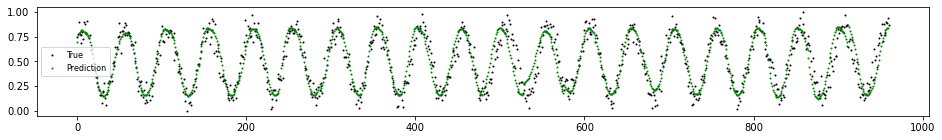

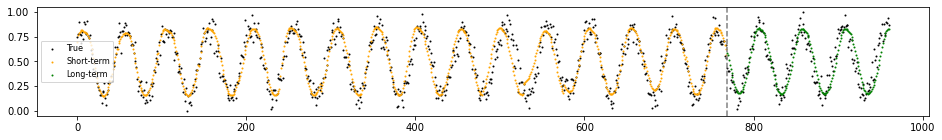

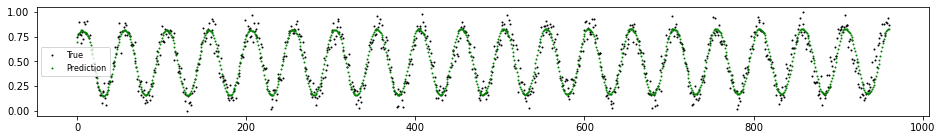

In [27]:
is_training = False * np.ones(traintesthistory.shape[0])
presultlong = np.zeros((int((history.shape[0]-initialwindow)/frequency),y.shape[1]))
#Short-term Prediction
ptrainlong = (model_long.predict([traintesthistory,traintestcontrol, 
                                  np.zeros((traintesthistory.shape[0],nfeature)),
                                  is_training])[0]).reshape((-1,nfeature))
plotprediction3b(obs.reshape((-1,nfeature)),ptrainlong,initialwindow, frequency, 1,1)
is_training = np.ones((1,1))
buff = np.zeros(history[initialwindow:initialwindow+1].shape)
buff[:] = history[initialwindow:initialwindow+1]
state = np.zeros((1,nfeature))
presultlong = model_long.predict([buff,np.reshape(control[initialwindow:, 0,:], (1, -1, ncontrol)), 
                                             state, is_training])[0]
plotpredictionb(obs.reshape((-1,nfeature)), ptrainlong, presultlong[0], initialwindow, frequency, 1, 1)
is_training = np.ones((1,1))
buff = np.zeros(history[:1].shape)
buff[:] = history[:1]
state = np.zeros((1,nfeature))
presultlong = model_long.predict([buff,np.reshape(control[:, 0,:], (1, -1, ncontrol)), 
                                             state, is_training])[0]
plotpredictionlong(obs.reshape((-1,nfeature)), presultlong, frequency, 1, 1)

In [28]:
model_long.save_weights("saved_weights/test4_ckpt")
model_long.save('saved_model/test4_model')

INFO:tensorflow:Assets written to: saved_model/test4_model\assets


18


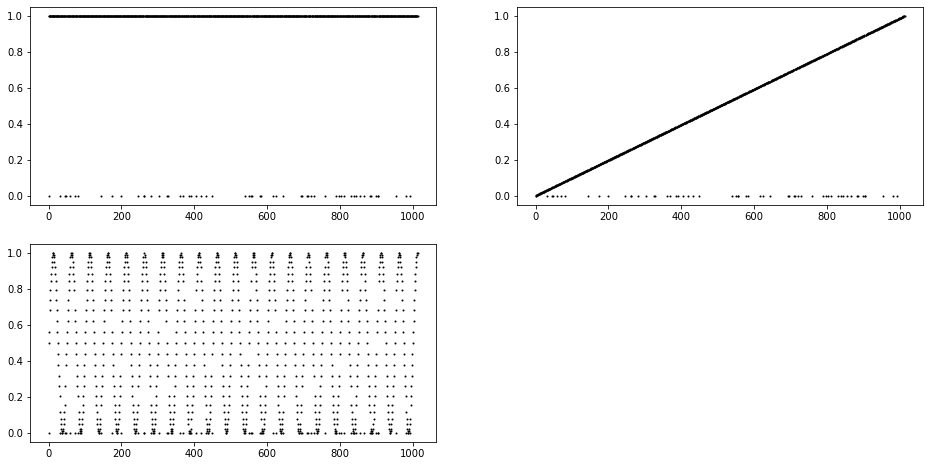

In [24]:
x = np.arange(totaln)
y00 = generate_periodic(x, 0.02, 0.5, 0,final_freq =0.02, final_amplitude = 0.5)


y00 = np.expand_dims(y00,axis =1)
#y01 = generate_periodic(x, 0.005, 0.5, 0,final_freq =0.005, final_amplitude = 0.5)
#y01 = np.expand_dims(y01,axis =1)

#y0 = np.concatenate((y00, y01), axis = 1)
y0 = normalization(y00)
label = np.random.randint(19, size = (totaln, 1))
print(np.max(label))
label[label < 17.5] = 1
label[label > 17.5] = 0
x = np.expand_dims(x/totaln,axis = 1)*label
x = np.concatenate((label,x),axis = 1)
y = label*y0
np.save('label5.npy', label)
plot1(np.arange(totaln),np.concatenate((x,y),axis = 1),2,2)
history, control, yout, historyt, controlt, youtt, traintesthistory, traintestcontrol, obs, initialwindow, xin, yin = GenerateSets(x, y0, frequency, twindow, twindow2, predictwindow)
y5a = np.copy(y0)
np.save("y5a.npy", y5a)
history, control, yout, historyt, controlt, youtt, traintesthistory, traintestcontrol, obs, initialwindow, xin, yin = GenerateSets(x, y, frequency, twindow, twindow2, predictwindow)
history2 = GenerateSets(x, y0, frequency, twindow, twindow2, predictwindow)[0]
y5 = np.copy(y)
np.save("y5.npy", y5)

In [25]:
ncontrol = 2
#training
a = time.time()
model_long = build_model2(nneck, twindow = twindow, twindow2 = twindow2, nfeature = nfeature, ncontrol = ncontrol, lr = 0.001)
is_training = True*np.ones(initialwindow)
h = model_long.fit(
            [historyt,controlt, np.zeros((historyt.shape[0], nfeature)), is_training, controlt[:,:,:nfeature]],
            [youtt, youtt],
            batch_size=nbsize,
            epochs=nepochs,
            validation_split=validsplit,
            verbose=1,shuffle=True)

(None, 4, 4)
Epoch 1/500
16/16 [==============================] - 0s 16ms/step - loss: 0.2153 - multiply_3_loss: 0.2121 - GRU1_loss: 0.4400 - multiply_3_accuracy: 0.0581 - GRU1_accuracy: 0.0000e+00
Epoch 2/500
16/16 [==============================] - 0s 13ms/step - loss: 0.1578 - multiply_3_loss: 0.1547 - GRU1_loss: 0.4350 - multiply_3_accuracy: 0.0672 - GRU1_accuracy: 0.0000e+00
Epoch 3/500
16/16 [==============================] - 0s 13ms/step - loss: 0.1441 - multiply_3_loss: 0.1411 - GRU1_loss: 0.4345 - multiply_3_accuracy: 0.0665 - GRU1_accuracy: 0.0000e+00
Epoch 4/500
16/16 [==============================] - 0s 13ms/step - loss: 0.1365 - multiply_3_loss: 0.1336 - GRU1_loss: 0.4328 - multiply_3_accuracy: 0.0673 - GRU1_accuracy: 0.0000e+00
Epoch 5/500
16/16 [==============================] - 0s 13ms/step - loss: 0.1305 - multiply_3_loss: 0.1278 - GRU1_loss: 0.4309 - multiply_3_accuracy: 0.0686 - GRU1_accuracy: 0.0000e+00
Epoch 6/500
16/16 [==============================] - 0s 13ms/s

16/16 [==============================] - 0s 13ms/step - loss: 0.0042 - multiply_3_loss: 0.0021 - GRU1_loss: 0.3558 - multiply_3_accuracy: 0.0894 - GRU1_accuracy: 0.0181
Epoch 91/500
16/16 [==============================] - 0s 13ms/step - loss: 0.0042 - multiply_3_loss: 0.0021 - GRU1_loss: 0.3557 - multiply_3_accuracy: 0.0894 - GRU1_accuracy: 0.0179
Epoch 92/500
16/16 [==============================] - 0s 13ms/step - loss: 0.0041 - multiply_3_loss: 0.0021 - GRU1_loss: 0.3555 - multiply_3_accuracy: 0.0894 - GRU1_accuracy: 0.0176
Epoch 93/500
16/16 [==============================] - 0s 13ms/step - loss: 0.0042 - multiply_3_loss: 0.0021 - GRU1_loss: 0.3555 - multiply_3_accuracy: 0.0894 - GRU1_accuracy: 0.0174
Epoch 94/500
16/16 [==============================] - 0s 13ms/step - loss: 0.0042 - multiply_3_loss: 0.0021 - GRU1_loss: 0.3556 - multiply_3_accuracy: 0.0894 - GRU1_accuracy: 0.0178
Epoch 95/500
16/16 [==============================] - 0s 13ms/step - loss: 0.0041 - multiply_3_loss: 0.

16/16 [==============================] - 0s 13ms/step - loss: 0.0027 - multiply_3_loss: 8.5156e-04 - GRU1_loss: 0.3504 - multiply_3_accuracy: 0.0894 - GRU1_accuracy: 0.0132
Epoch 179/500
16/16 [==============================] - 0s 13ms/step - loss: 0.0027 - multiply_3_loss: 8.0986e-04 - GRU1_loss: 0.3503 - multiply_3_accuracy: 0.0894 - GRU1_accuracy: 0.0132
Epoch 180/500
16/16 [==============================] - 0s 13ms/step - loss: 0.0027 - multiply_3_loss: 8.8248e-04 - GRU1_loss: 0.3505 - multiply_3_accuracy: 0.0894 - GRU1_accuracy: 0.0132
Epoch 181/500
16/16 [==============================] - 0s 13ms/step - loss: 0.0027 - multiply_3_loss: 8.6492e-04 - GRU1_loss: 0.3506 - multiply_3_accuracy: 0.0894 - GRU1_accuracy: 0.0132
Epoch 182/500
16/16 [==============================] - 0s 13ms/step - loss: 0.0027 - multiply_3_loss: 8.7375e-04 - GRU1_loss: 0.3502 - multiply_3_accuracy: 0.0894 - GRU1_accuracy: 0.0136
Epoch 183/500
16/16 [==============================] - 0s 13ms/step - loss: 0.0

16/16 [==============================] - 0s 13ms/step - loss: 0.0022 - multiply_3_loss: 5.1000e-04 - GRU1_loss: 0.3484 - multiply_3_accuracy: 0.0894 - GRU1_accuracy: 0.0125
Epoch 265/500
16/16 [==============================] - 0s 13ms/step - loss: 0.0022 - multiply_3_loss: 4.8722e-04 - GRU1_loss: 0.3483 - multiply_3_accuracy: 0.0894 - GRU1_accuracy: 0.0123
Epoch 266/500
16/16 [==============================] - 0s 13ms/step - loss: 0.0022 - multiply_3_loss: 4.8908e-04 - GRU1_loss: 0.3484 - multiply_3_accuracy: 0.0894 - GRU1_accuracy: 0.0123
Epoch 267/500
16/16 [==============================] - 0s 13ms/step - loss: 0.0024 - multiply_3_loss: 6.8515e-04 - GRU1_loss: 0.3486 - multiply_3_accuracy: 0.0894 - GRU1_accuracy: 0.0127
Epoch 268/500
16/16 [==============================] - 0s 13ms/step - loss: 0.0027 - multiply_3_loss: 0.0010 - GRU1_loss: 0.3494 - multiply_3_accuracy: 0.0894 - GRU1_accuracy: 0.0152
Epoch 269/500
16/16 [==============================] - 0s 13ms/step - loss: 0.0026 

16/16 [==============================] - 0s 13ms/step - loss: 0.0019 - multiply_3_loss: 3.7316e-04 - GRU1_loss: 0.3487 - multiply_3_accuracy: 0.0894 - GRU1_accuracy: 0.0116
Epoch 351/500
16/16 [==============================] - 0s 13ms/step - loss: 0.0019 - multiply_3_loss: 3.6155e-04 - GRU1_loss: 0.3485 - multiply_3_accuracy: 0.0894 - GRU1_accuracy: 0.0114
Epoch 352/500
16/16 [==============================] - 0s 13ms/step - loss: 0.0019 - multiply_3_loss: 4.0344e-04 - GRU1_loss: 0.3488 - multiply_3_accuracy: 0.0894 - GRU1_accuracy: 0.0114
Epoch 353/500
16/16 [==============================] - 0s 13ms/step - loss: 0.0020 - multiply_3_loss: 4.1953e-04 - GRU1_loss: 0.3490 - multiply_3_accuracy: 0.0894 - GRU1_accuracy: 0.0115
Epoch 354/500
16/16 [==============================] - 0s 13ms/step - loss: 0.0019 - multiply_3_loss: 3.7983e-04 - GRU1_loss: 0.3488 - multiply_3_accuracy: 0.0894 - GRU1_accuracy: 0.0115
Epoch 355/500
16/16 [==============================] - 0s 13ms/step - loss: 0.0

16/16 [==============================] - 0s 13ms/step - loss: 0.0017 - multiply_3_loss: 2.9000e-04 - GRU1_loss: 0.3490 - multiply_3_accuracy: 0.0894 - GRU1_accuracy: 0.0087
Epoch 437/500
16/16 [==============================] - 0s 13ms/step - loss: 0.0017 - multiply_3_loss: 3.0123e-04 - GRU1_loss: 0.3490 - multiply_3_accuracy: 0.0894 - GRU1_accuracy: 0.0085
Epoch 438/500
16/16 [==============================] - 0s 13ms/step - loss: 0.0017 - multiply_3_loss: 2.9124e-04 - GRU1_loss: 0.3490 - multiply_3_accuracy: 0.0894 - GRU1_accuracy: 0.0088
Epoch 439/500
16/16 [==============================] - 0s 13ms/step - loss: 0.0017 - multiply_3_loss: 2.9731e-04 - GRU1_loss: 0.3491 - multiply_3_accuracy: 0.0894 - GRU1_accuracy: 0.0083
Epoch 440/500
16/16 [==============================] - 0s 13ms/step - loss: 0.0017 - multiply_3_loss: 2.8794e-04 - GRU1_loss: 0.3488 - multiply_3_accuracy: 0.0894 - GRU1_accuracy: 0.0087
Epoch 441/500
16/16 [==============================] - 0s 13ms/step - loss: 0.0

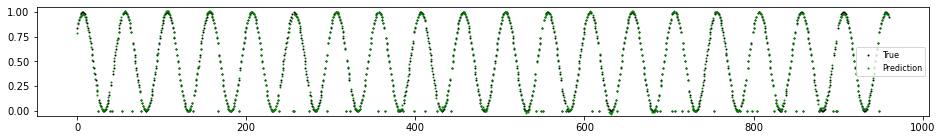

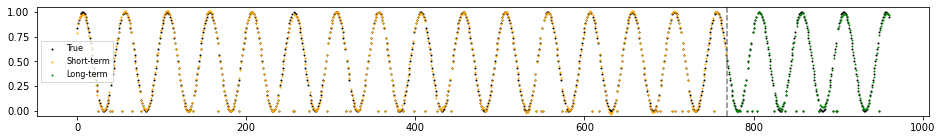

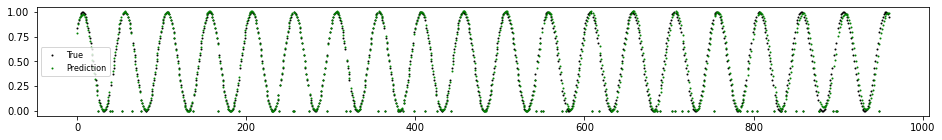

In [26]:
is_training = False * np.ones(traintesthistory.shape[0])
presultlong = np.zeros((int((history.shape[0]-initialwindow)/frequency),y.shape[1]))
#Short-term Prediction
ptrainlong = (model_long.predict([traintesthistory,traintestcontrol, 
                                  np.zeros((traintesthistory.shape[0],nfeature)),
                                  is_training, traintestcontrol[:,:,:nfeature]])[0]).reshape((-1,nfeature))
plotprediction3b(obs.reshape((-1,nfeature)),ptrainlong,initialwindow, frequency, 1,1)
is_training = np.ones((1,1))
buff = np.zeros(history[initialwindow:initialwindow+1].shape)
buff[:] = history[initialwindow:initialwindow+1]
state = np.zeros((1,nfeature))
presultlong = model_long.predict([buff,np.reshape(control[initialwindow:, 0,:], (1, -1, ncontrol)), 
                                             state, is_training, np.reshape(control[initialwindow:, 0,:nfeature], (1, -1, nfeature))])[0]
plotpredictionb(obs.reshape((-1,nfeature)), ptrainlong, presultlong[0], initialwindow, frequency, 1, 1)
is_training = np.ones((1,1))
buff = np.zeros(history[:1].shape)
buff[:] = history[:1]
state = np.zeros((1,nfeature))
presultlong = model_long.predict([buff,np.reshape(control[:, 0,:], (1, -1, ncontrol)), 
                                             state, is_training, np.reshape(control[:, 0,:nfeature], (1, -1, nfeature))])[0]
plotpredictionlong(obs.reshape((-1,nfeature)), presultlong, frequency, 1, 1)

In [21]:
model_long.save_weights("saved_weights/test5_ckpt")
model_long.save('saved_model/test5_model')

INFO:tensorflow:Assets written to: saved_model/test5_model\assets
